Sales Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'aerofit_treadmill.csv'  
data = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print("Data Overview:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None

Descriptive Statistics:
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.0000

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [5]:
# Summary statistics by Product
print("\nSummary Statistics by Product:")
product_groups = data.groupby('Product')
summary_by_product = product_groups[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].describe()
print(summary_by_product)


Summary Statistics by Product:
          Age                                                  Education  \
        count   mean       std   min    25%   50%    75%   max     count   
Product                                                                    
KP281    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0      80.0   
KP481    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0      60.0   
KP781    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0      40.0   

                    ...   Income           Miles                               \
              mean  ...      75%       max count        mean        std   min   
Product             ...                                                         
KP281    15.037500  ...  53439.0   68220.0  80.0   82.787500  28.874102  38.0   
KP481    15.116667  ...  53439.0   67083.0  60.0   87.933333  33.263135  21.0   
KP781    17.325000  ...  90886.0  104581.0  40.0  166.900000  60.066544  80.0   

                        

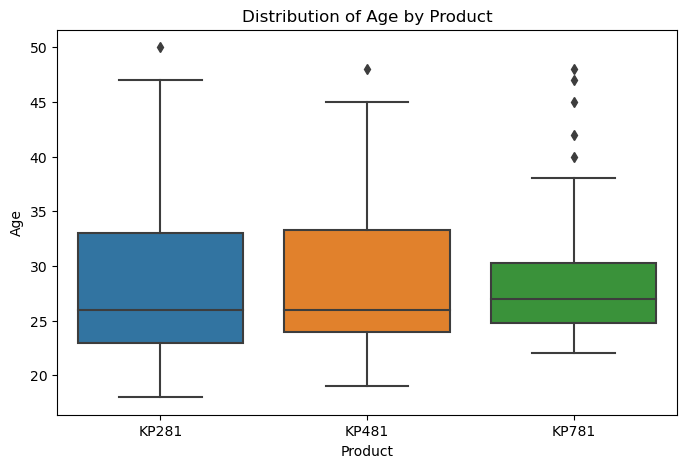

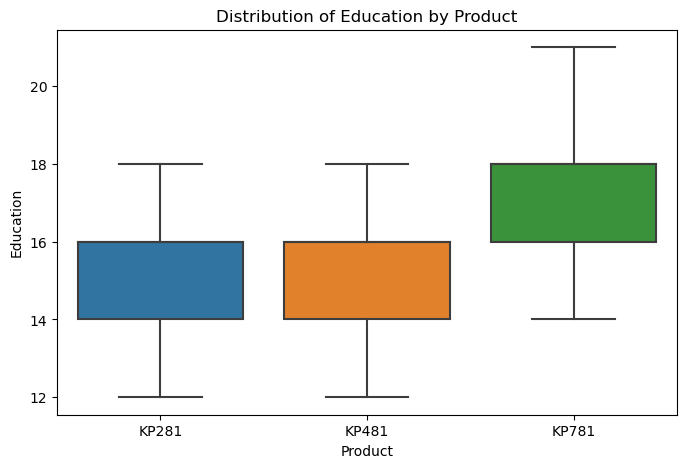

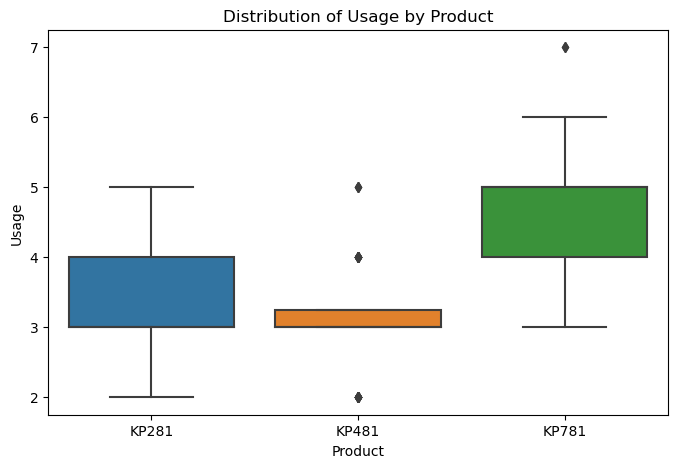

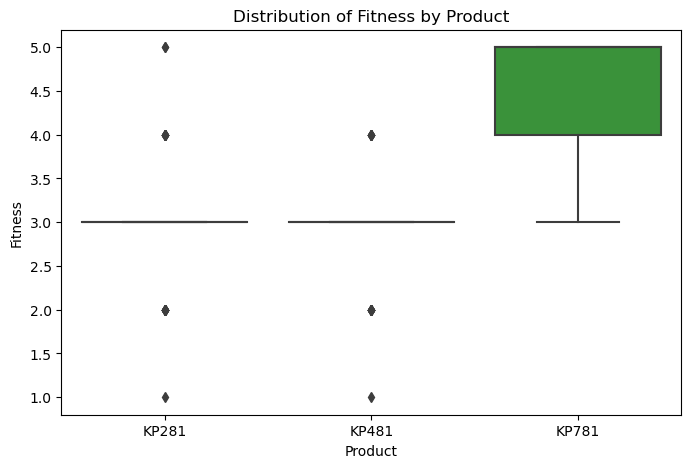

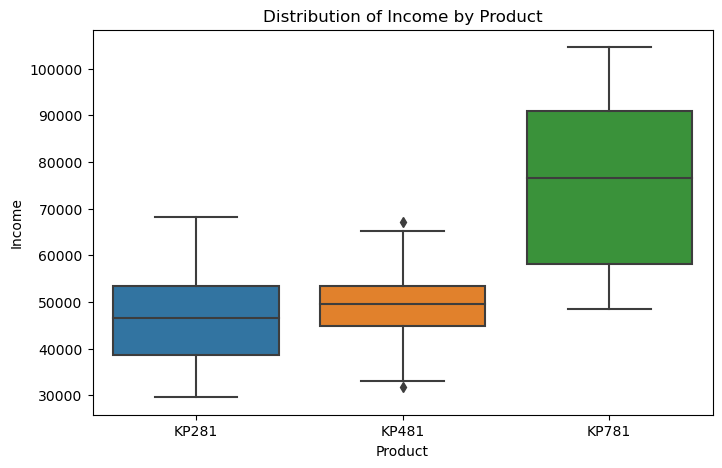

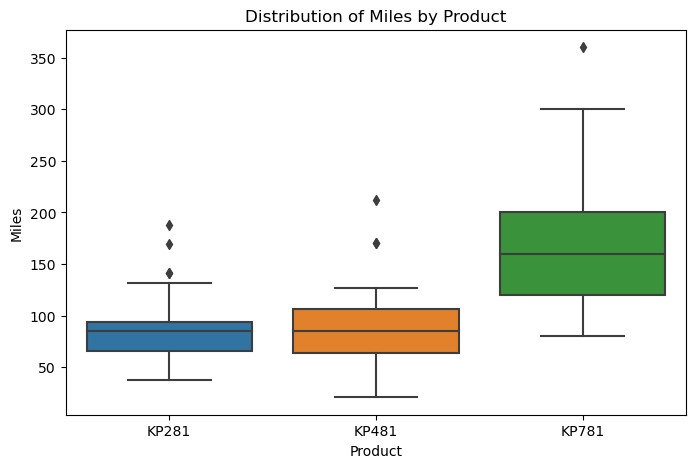

In [6]:
# Visualizing distributions for numerical features
numerical_features = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Product', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Product')
    plt.show()


Contingency Table for Product vs Gender:
Gender      Female       Male
Product                      
KP281    50.000000  50.000000
KP481    48.333333  51.666667
KP781    17.500000  82.500000


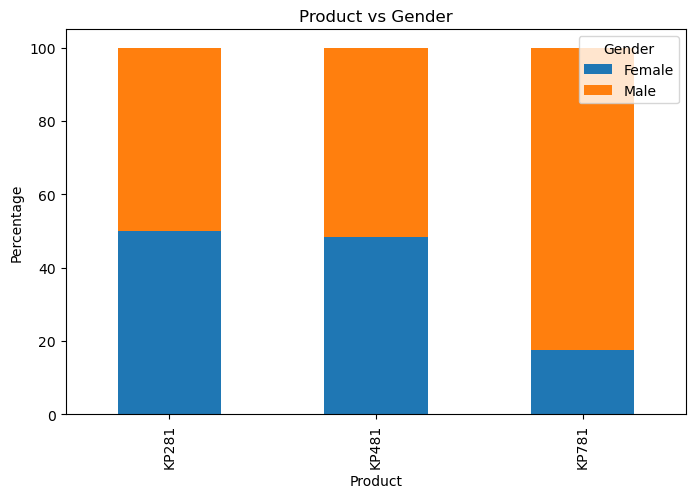


Contingency Table for Product vs MaritalStatus:
MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5


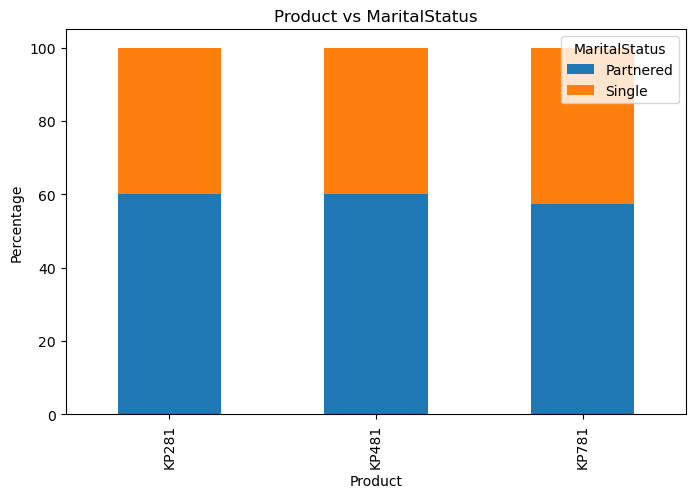

In [7]:
# Analyzing categorical variables with two-way contingency tables
categorical_features = ['Gender', 'MaritalStatus']
for feature in categorical_features:
    contingency_table = pd.crosstab(data['Product'], data[feature], normalize='index') * 100
    print(f"\nContingency Table for Product vs {feature}:")
    print(contingency_table)
    contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Product vs {feature}')
    plt.ylabel('Percentage')
    plt.show()

In [8]:
# Conditional and Marginal Probabilities for Product vs Gender
gender_product_table = pd.crosstab(data['Product'], data['Gender'])
gender_marginal_probs = gender_product_table.sum(axis=0) / gender_product_table.sum().sum()
print("\nGender Marginal Probabilities:")
print(gender_marginal_probs)


Gender Marginal Probabilities:
Gender
Female    0.422222
Male      0.577778
dtype: float64


In [9]:
conditional_probs = gender_product_table.div(gender_product_table.sum(axis=1), axis=0)
print("\nConditional Probabilities of Gender given Product:")
print(conditional_probs)


Conditional Probabilities of Gender given Product:
Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000
